# movie_budget_and_vote_average.ipynb

In this notebook we will explore the relationship between budget and vote_average.

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sns
from scipy.stats import linregress
from reader import generic_reader

First we read in the movie data from `movies_prepared.csv` and see that we have 6200 movies.

In [2]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_prepared.csv")
len(df_movies)

6200

Then we choose the columns we will work in this notebook.

In [3]:
columns_to_keep = ['original_title', 'release_date', 'vote_average', 'vote_count', 'budget_2023_usd']
df_movies = df_movies[columns_to_keep].copy()
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies

,original_title,release_date,vote_average,vote_count,budget_2023_usd
0,Passion of Mind,2000-01-07,5.800,42,21233560
1,My Dog Skip,2000-01-12,6.700,280,10616780
2,Next Friday,2000-01-12,6.453,609,19464096
3,Supernova,2000-01-14,4.940,409,159251699
4,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,4.900,369,8847317
...,...,...,...,...,...
6195,The Iron Claw,2023-12-21,7.540,1088,15900000
6196,Freud's Last Session,2023-12-22,6.659,145,10000000
6197,All of Us Strangers,2023-12-22,7.443,898,5000000
6198,The Boys in the Boat,2023-12-25,7.233,311,40000000


Now we look at the statistics and histograms of the data.

We see that vote_average is approximately normally distributed around the mean of 5.8.

vote_count is not normally distributed: Most movies only have a few votes.

And budget is not normally distributed: Most movies only have a small budget.

In [4]:
df_movies.describe()

,release_date,vote_average,vote_count,budget_2023_usd
count,6200,6200.000000,6200.000000,6.200000e+03
mean,2011-06-26 01:18:58.064516096,5.835595,1808.168548,3.565044e+07
min,2000-01-07 00:00:00,1.300000,10.000000,1.000000e+00
25%,2006-08-30 18:00:00,5.200000,63.750000,2.727046e+06
50%,2011-06-06 00:00:00,6.000000,442.500000,1.397358e+07
75%,2016-04-07 00:00:00,6.600000,1943.250000,4.247019e+07
max,2023-12-25 00:00:00,9.400000,38021.000000,6.079353e+08
std,NaN,1.107755,3448.557902,5.541060e+07


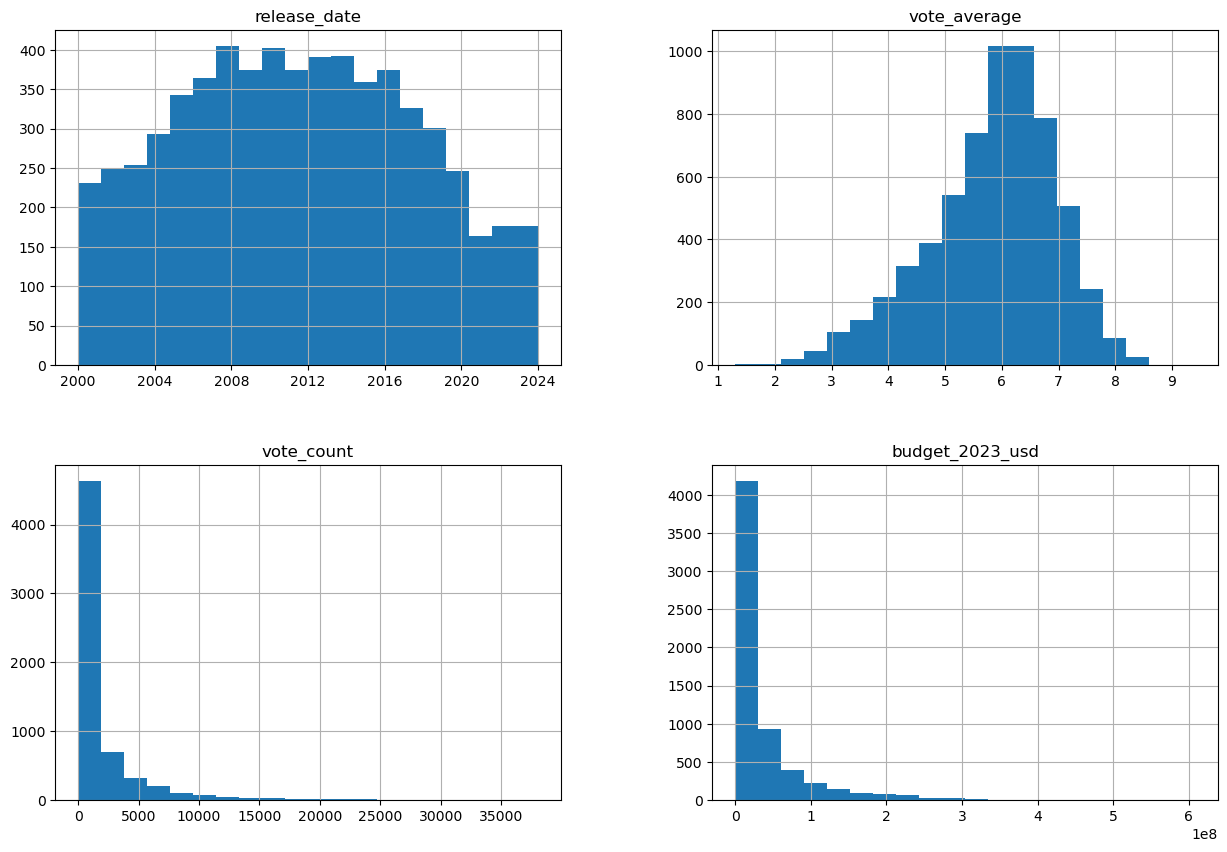

In [5]:
df_movies.hist(figsize=(15, 10), bins=20);

Now we plot budget along the x-axis and vote_average along the y-axis.

We see that there do appear to be a correlation between budget and vote_average:

The more money the production company have spend on the movie, the higher the users of TMDB tend to score it.

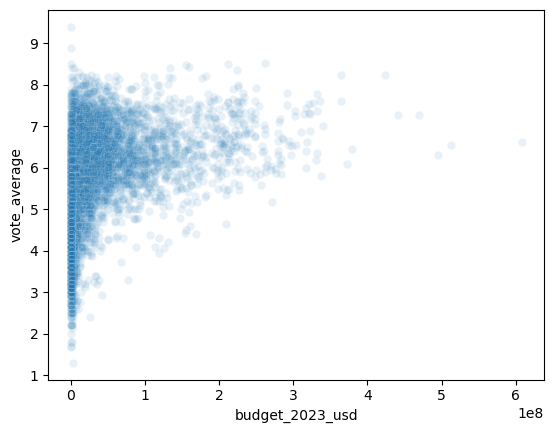

In [6]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1);

Now we make a linear regression between budget and vote_average.

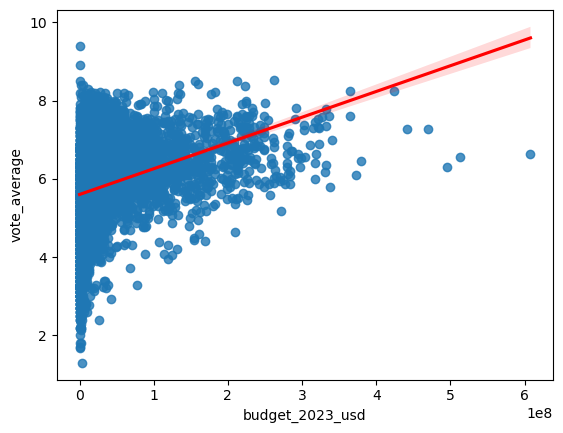

In [9]:
sns.regplot(x='budget_2023_usd', y='vote_average', data=df_movies, line_kws={'color': 'red'});

In [8]:
# Extract x and y
x = df_movies['budget_2023_usd']
y = df_movies['vote_average']

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(x, y)

# Print equation and R-value
print(f"Regression line: y = {slope:.12f}x + {intercept:.2f}")
print(f"R-value: {r_value:.4f}")

Regression line: y = 0.000000006579x + 5.60
R-value: 0.3291


We see that there is a positive correlation between movie budget and vote_average:

**_vote_average = 0.000000006579 × budget + 5.60_**

Although the R-value is 0.3291 so it is weak.